<a href="https://colab.research.google.com/github/vihaanm12345/Medical-Dataset-image-classification/blob/main/VM_image_classification_project_best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 692s 135ms/step - accuracy: 0.5534 - loss: 1.2429 - val_accuracy: 0.7998 - val_loss: 0.4576
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 599s 118ms/step - accuracy: 0.7935 - loss: 0.5040 - val_accuracy: 0.8038 - val_loss: 0.4745
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 598s 118ms/step - accuracy: 0.8441 - loss: 0.3710 - val_accuracy: 0.8656 - val_loss: 0.3278
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 597s 118ms/step - accuracy: 0.8784 - loss: 0.2951 - val_accuracy: 0.8503 - val_loss: 0.4103
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 603s 119ms/step - accuracy: 0.9032 - loss: 0.2454 - val_accuracy: 0.8862 - val_loss: 0.3349
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 597s 118ms/step - accuracy: 0.9225 - loss: 0.2045 - val_accuracy: 0.8904 - val_loss: 0.3728
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 665s 131ms/step - accuracy: 0.9369 - loss: 0.1740 - val_accuracy: 0.9055 - val_loss: 0.3483
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 602s 119ms/step - ac

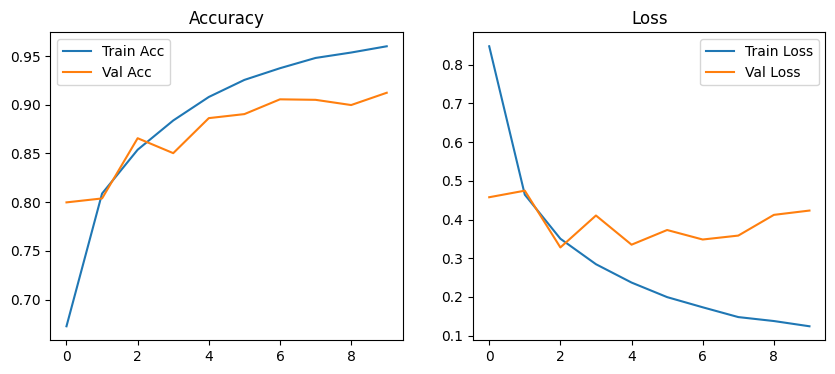

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Download dataset
path = kagglehub.dataset_download("ramachandraudupa/multicancer-dataset")
print("Path to dataset files:", path)

# Load dataset (assuming it’s organized into subfolders by cancer type)
img_size = (224, 224)
batch_size = 32

orig_train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "Cancer_Dataset", "train"),  # adjust folder if different
    image_size=img_size,
    batch_size=batch_size
)

orig_val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "Cancer_Dataset", "val"),  # adjust folder if different
    image_size=img_size,
    batch_size=batch_size
)

class_names = orig_train_ds.class_names
print("Classes:", class_names)

# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_ds = orig_train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = orig_val_ds.map(lambda x, y: (normalization_layer(x), y))

# Build CNN model
model_e = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')
])

model_e.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model_e.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()